In [4]:
%load_ext autoreload
%autoreload
%cd /home/jupyter/MathVGerrmandering_CMAT_2021/
from src import *
from src.nodes import *
from src.mcmc import *
notebook = True
skip_inputs = 'y'
run_mcmc = True
# %run -i redistricter

nodes_opts = {
    'abbr'             : 'TX',
    'level'            : 'cntyvtd',
    'district_type'    : 'cd',
    'contract_thresh'  : 10,
}
    
mcmc_opts = {
    'max_steps'             : 6,
    'pop_diff_exp'          : 2,
    'defect_multiplier'     : 5.0,
    'anneal'                : 0,
    'pop_deviation_target'  : 0.01,
    'pop_deviation_stop'    : False,
    'report_period'         : 1,
    'save_period'           : 3,
}

N = Nodes(**nodes_opts)
mcmc_opts['nodes_tbl'] = N.tbl
M = MCMC(random_seed=9000000, **mcmc_opts)

M.run_chain()
# M.post_process()

# M.get_stats(return_df=True)
# M.get_counties()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/jupyter/MathVGerrmandering_CMAT_2021
Get crosswalks_TX_2010_tabblock   ... tabblock table exists ... success
Get assignments_TX_2020_tabblock  ... tabblock table exists ... success
Get shapes_TX_2020_tabblock       ... tabblock table exists ... success
Get census_TX_2020_tabblock       ... tabblock table exists ... success
Get elections_TX_2020_tabblock    ... tabblock table exists ... success
Get nodes_TX_2020_cntyvtd_cd_contract10 ... cntyvtd table exists ... success
random_seed 9000000: step 1 0hrs 0min 11.99sec, pop_deviation=148.7, intersect_defect=12, whole_defect=10
random_seed 9000000: step 2 0hrs 0min 13.19sec, pop_deviation=148.7, intersect_defect=12, whole_defect=10
random_seed 9000000: step 3 0hrs 0min 14.31sec, pop_deviation=127.0, intersect_defect=12, whole_defect=10
random_seed 9000000: step 4 0hrs 1min 21.65sec, pop_deviation=126.7, intersect_defect=12, whole_defect=10
random_s

In [22]:
%load_ext autoreload
%autoreload
from src import *
tbl = f'{proj_id}.redistricting_data.nodes_TX_2020_cntyvtd_cd_contract10'

# q = f"select polygon, geoid, cd, county, total_pop, density, aland, polsby_popper from {tbl}"
q = f"select polygon, geoid, aland, cd from {tbl} where cd = 1"
df = run_query(q)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%load_ext autoreload
%autoreload
from src import *

shape_tbl = f'{proj_id}.redistricting_data.shapes_TX_2020_tabblock'
assignments_tbl = f'{proj_id}.redistricting_data.assignments_TX_2020_tabblock'

query = f"""
select
    st_union_agg(B.polygon) as geometry
from
    {assignments_tbl} as A
inner join
    {shape_tbl} as B
on
    A.geoid = B.geoid
where
    cast(cd as int) = 1
"""
df = run_query(query)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%load_ext autoreload
%autoreload
from src import *

shape_tbl = f'{proj_id}.redistricting_data.shapes_TX_2020_tabblock'
assignments_tbl = f'{proj_id}.redistricting_data.assignments_TX_2020_tabblock'

query = f"""
select
    geoid
from
    {assignments_tbl} as A
where
    cd = 2
"""
df = run_query(query)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


BadRequest: 400 No matching signature for operator = for argument types: STRING, INT64. Supported signature: ANY = ANY at [7:5]

(job ID: 5ff6b0da-5c3d-4889-845f-c3bdae2f2e41)

                     -----Query Job SQL Follows-----                     

    |    .    |    .    |    .    |    .    |    .    |    .    |
   1:
   2:select
   3:    geoid
   4:from
   5:    cmat-315920.redistricting_data.assignments_TX_2020_tabblock as A
   6:where
   7:    cd = 2
    |    .    |    .    |    .    |    .    |    .    |    .    |

In [38]:
df.shape

(11, 4)

In [31]:
df.shape

(11, 4)

In [32]:
geo = gpd.GeoSeries.from_wkt(df['polygon'], crs=crs_census).to_crs(crs_length)
gdf = gpd.GeoDataFrame(df.drop(columns='polygon'), geometry=geo)

<AxesSubplot:>

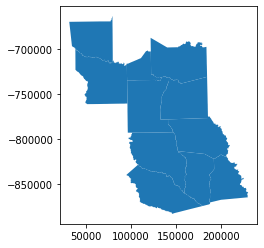

In [34]:
gdf.plot()

In [26]:
c = gdf.dissolve()
c.area / (meters_per_mile**2)

0    8464.566584
dtype: float64

0    8448.229575
dtype: float64

In [24]:
gdf['aland'].sum()

8037.856101315956

In [103]:
# sorted(tuple(v)) for v in self.districts.values()
tuple(sorted(tuple(sorted(v)) for v in self.districts.values()))

(('001',
  '073',
  '113001000',
  '113001001',
  '113001002',
  '113001009',
  '113001011',
  '113001038',
  '113001039',
  '113001044',
  '113001045',
  '113001046',
  '113001047',
  '113001048',
  '113001049',
  '113001051',
  '113001052',
  '113001054',
  '113001055',
  '113001056',
  '113001057',
  '113001058',
  '113001059',
  '113001060',
  '113001061',
  '113001068',
  '113001077',
  '113001110',
  '113001115',
  '113001121',
  '113001125',
  '113001126',
  '113001128',
  '113001133',
  '113001136',
  '113001137',
  '113001141',
  '113001300',
  '113001301',
  '113001302',
  '113001303',
  '113001304',
  '113001305',
  '113001307',
  '113001308',
  '113001309',
  '113001310',
  '113001311',
  '113001312',
  '113001313',
  '113001314',
  '113001315',
  '113001316',
  '113001317',
  '113001707',
  '113001719',
  '113001720',
  '113001728',
  '113001730',
  '113001731',
  '113002060',
  '113002061',
  '113002062',
  '113002065',
  '113002066',
  '113002067',
  '113002070',
  '1130

In [94]:
self=M
grp = self.nodes_df.groupby(self.district_type)
self.districts = {k:tuple(sorted(v)) for k,v in grp.groups.items()}
grp = self.nodes_df.groupby('county')
self.counties = {k:tuple(sorted(v)) for k,v in grp.groups.items()}


self.districts
self.counties

{'Anderson': ('001',),
 'Andrews': ('003',),
 'Angelina': ('005',),
 'Aransas': ('007',),
 'Archer': ('009',),
 'Armstrong': ('011',),
 'Atascosa': ('013',),
 'Austin': ('015',),
 'Bailey': ('017',),
 'Bandera': ('019',),
 'Bastrop': ('021',),
 'Baylor': ('023',),
 'Bee': ('025',),
 'Bell': ('027',),
 'Bexar': ('029001001',
  '029001002',
  '029001003',
  '029001004',
  '029001005',
  '029001006',
  '029001007',
  '029001008',
  '029001009',
  '029001010',
  '029001011',
  '029001012',
  '029001013',
  '029001014',
  '029001015',
  '029001016',
  '029001017',
  '029001018',
  '029001019',
  '029001020',
  '029001021',
  '029001022',
  '029001023',
  '029001024',
  '029001025',
  '029001026',
  '029001027',
  '029001028',
  '029001029',
  '029001030',
  '029001031',
  '029001032',
  '029001033',
  '029001034',
  '029001035',
  '029001036',
  '029001037',
  '029001038',
  '029001039',
  '029001040',
  '029001041',
  '029001042',
  '029001043',
  '029001044',
  '029001045',
  '029001046',

In [38]:
M.get_counties()

,random_seed,step,total_pop,seats_cd,whole_target,intersect_target,intersect,intersect_defect,whole,whole_defect,defect
Anderson,9000000,0,57922,0.075519,1,0,1,1,0,1,2
Cherokee,9000000,0,50412,0.065727,1,0,1,1,0,1,2
Freestone,9000000,0,19435,0.025339,1,0,1,1,0,1,2
Henderson,9000000,0,82150,0.107107,1,0,1,1,0,1,2
Houston,9000000,0,22066,0.028770,1,0,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
Sabine,9000000,0,9894,0.012900,1,0,1,1,0,1,2
Zapata,9000000,0,13889,0.018109,1,0,1,1,0,1,2
San Jacinto,9000000,0,27402,0.035727,1,0,1,1,0,1,2
Loving,9000000,0,64,0.000083,1,0,1,1,0,1,2


In [54]:
self.adj[5]

AtlasView({'Anderson': {}, 'Cherokee': {}, 'Freestone': {}, 'Henderson': {}, 'Dallas': {}, 'Kaufman': {}, 'Van Zandt': {}})

In [56]:
for u, v, data in self.graph.edges(data=True):
    d = self.graph.nodes[u][self.district_type]
    if d in D:
        if self.graph.nodes[v][self.district_type] == d
            
    print(d)
    break


5


In [59]:
# self=M
# L = self.get_districts()[['total_pop']]
# pop_diff = L.merge(L, how='cross')
# pop_diff
self.get_stats()

In [74]:
L = self.get_districts()['total_pop']
pop_diff = pd.DataFrame([(x, y, abs(p-q)) for x, p in L.iteritems() for y, q in L.iteritems() if x < y])#.set_index([0,1])#.squeeze()
pop_diff

,0,1,2
0,1,2,75717
1,1,3,194021
2,1,4,60347
3,1,5,34862
4,1,6,85991
...,...,...,...
698,35,37,264986
699,35,38,28000
700,36,37,456011
701,36,38,692997


In [70]:
df = self.get_districts()['total_pop']
df

# .reset_index()
# df.merge(df, how='cross')

# df

1      738987
2      814704
3      933008
4      799334
5      773849
6      824978
7      800911
8      925239
9      770838
10    1368966
11     793557
12     837065
13     738212
14     413364
15     698457
16     757362
17     177783
18     796908
19     734733
20     772102
21     611069
22     655025
23     836126
24     822714
25    1389432
26     943106
27     762439
28     957024
29     738461
30     782976
31     648194
32     789666
33     720636
34     628173
35     344031
36    1065028
37     609017
38     372031
Name: total_pop, dtype: int64

In [23]:
self=M
self.districts

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38}

In [3]:
M.graph_to_df().sort_values('seats_cd', ascending=False)

,polsby_popper,total_pop,aland,perim,seats_cd,whole_target,intersect_target
Harris,NaN,4731145,NaN,NaN,6.168482,7.0,6.0
Dallas,NaN,2613539,NaN,NaN,3.407540,4.0,3.0
Tarrant,NaN,2110640,NaN,NaN,2.751859,3.0,2.0
Bexar,NaN,2009324,NaN,NaN,2.619763,3.0,2.0
Travis,NaN,1290188,NaN,NaN,1.682151,2.0,1.0
...,...,...,...,...,...,...,...
12,0.0,837065,1275.074787,1462.678325,NaN,NaN,NaN
16,0.0,757362,710.887057,1201.416435,NaN,NaN,NaN
7,0.0,800911,162.075945,720.322348,NaN,NaN,NaN
18,0.0,796908,235.509397,1076.253029,NaN,NaN,NaN


In [90]:
self.nodes_df
E = self.nodes_df[['county', self.district_type]].drop_duplicates()
G = nx.from_pandas_edgelist(E, source='county', target=self.district_type)

counties  = self.nodes_df.groupby('county')[['total_pop', self.seats_col]].sum()
counties['whole_target']     = np.ceil (counties[self.seats_col]).astype(int)
counties['intersect_target'] = np.floor(counties[self.seats_col]).astype(int)
nx.set_node_attributes(G, counties.to_dict('index'))

districts = self.nodes_df.groupby(self.district_type)[['total_pop', 'aland', 'perim']].sum()
nx.set_node_attributes(G, districts.to_dict('index'))
list(G.nodes(data=True))[:10]

[('Rusk',
  {'total_pop': 52214,
   'seats_cd': 0.06807677547532595,
   'whole_target': 1,
   'intersect_target': 0}),
 (1,
  {'total_pop': 738987,
   'aland': 8037.856101315955,
   'perim': 1789.9347481753578}),
 ('Gregg',
  {'total_pop': 124239,
   'seats_cd': 0.16198319432104555,
   'whole_target': 1,
   'intersect_target': 0}),
 ('Shelby',
  {'total_pop': 24022,
   'seats_cd': 0.03131995825771413,
   'whole_target': 1,
   'intersect_target': 0}),
 ('Harrison',
  {'total_pop': 68839,
   'seats_cd': 0.08975250214398349,
   'whole_target': 1,
   'intersect_target': 0}),
 ('Smith',
  {'total_pop': 233479,
   'seats_cd': 0.30441064582686406,
   'whole_target': 1,
   'intersect_target': 0}),
 ('San Augustine',
  {'total_pop': 7918,
   'seats_cd': 0.010323513008266618,
   'whole_target': 1,
   'intersect_target': 0}),
 ('Panola',
  {'total_pop': 22491,
   'seats_cd': 0.029323835699535773,
   'whole_target': 1,
   'intersect_target': 0}),
 ('Sabine',
  {'total_pop': 9894,
   'seats_cd': 0.

In [87]:
q = self.adj.copy()
q.remove_edges_from([(13, v) for v in q[13]])
q[13]

AtlasView({})

In [82]:


# districts = list(sorted(set(self.nodes_df[self.district_type])))
# # counties
# # districts
# d = districts[0]
# d
# # # e = G[d]
# # # G.remove_edges_from(e)
# # G[d]

# def compute(G):
#     for c in counties:
#         G.nodes[c]['intersect'] = G.degree[c]
#         G.nodes[c]['whole'] = sum(G.degree[d] == 1 for d in G[c])
#     return pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
# #         print(c, G.nodes[c]['whole'], G.nodes[c]['intersect'])
    
# H = nx.subgraph_view(G, filter_edge = lambda u, v: u!=d and v!=d).copy()
# for n in comp[0]:
#     H.add_edge(n, d0)
# for n in comp[1]:
#     H.add_edge(n, d1)

    
# df_G = compute(G)
# df_H = compute(H)
# df_G.merge(df_H, left_index=True, right_index=True)

# # (df_H, oi)

# # mask = (df_G != df_H).any(axis=1)
# # df_G

# # sum(u==d or v==d for u, v in G.edges)

# # for u,v in H.edges:
# #     print(u==d or v==d)

# H.edges
# for u,v in G.edges:
#     print(u, v, f(u,v))


# H = nx.subgraph_view(G, filter_edge = lambda u, v: ~(u==d | v==d))
# H[d]
# counties  = list(set(self.nodes_df['county']))
# districts = list(set(self.nodes_df[self.district_type]))
# G = nx.from_pandas_edgelist(E, source='county', target=self.district_type)
# for c in counties:
#     G.nodes[c]['intersect'] = G.degree[c]
#     G.nodes[c]['whole'] = sum(G.degree[d] == 1 for d in G[c])


# G.edges()

,total_pop,seats_cd,whole_target
county,,,
Anderson,57922,0.075519,1.0
Andrews,18610,0.024264,1.0
Angelina,86395,0.112642,1.0
Aransas,23830,0.031070,1.0
Archer,8560,0.011161,1.0
...,...,...,...
Wood,44843,0.058466,1.0
Yoakum,7694,0.010031,1.0
Young,17867,0.023295,1.0


In [103]:
G = nx.Graph()
d = {'a':17}
G.add_node(1, **d)

for n in G.nodes:
    for k, v in d.items():
        try:
            G.nodes[n][k] +x

# G.add_node(1, a=7)
G.nodes(data=True)

NodeDataView({1: {'a': 17}})

In [20]:
def f():
    for d, data in self.districts.items():
        data['nodes'] = set()
    print
    for n, d in self.graph.nodes(data=self.district_type):
        self.districts[d]['nodes'].add(n)
    return self.districts

def g():
    for d, data in self.districts.items():
        data['nodes'] = list()
    for n, d in self.graph.nodes(data=self.district_type):
        self.districts[d]['nodes'].append(n)
    self.districts[d]['nodes'] = list(set(self.districts[d]['nodes']))
    return self.districts

def h():
    for d, data in self.districts.items():
        data['nodes'] = list()
    for n, d in self.graph.nodes(data=self.district_type):
        self.districts[d]['nodes'].append(n)
    self.districts[d]['nodes'] = list(np.unique(self.districts[d]['nodes']))
    return self.districts


n1 = f()
n2 = g()
n3 = h()
print(n1 == n2, n2==n3)
%timeit f()
%timeit g()
%timeit h()

True True
1.9 ms ± 29.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.77 ms ± 51.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.79 ms ± 58.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [26]:
self=M
self.plans_rec#return_df=True)

[           random_seed  step  cd
 001            9000000     0   5
 073            9000000     0   5
 161            9000000     0   5
 213            9000000     0   5
 225            9000000     0   8
 ...                ...   ...  ..
 453000420      9000000     0  25
 453000422      9000000     0  25
 453000429      9000000     0  25
 453000440      9000000     0  25
 453000425      9000000     0  25
 
 [4808 rows x 3 columns],
            random_seed  step  cd
 001            9000000     1   5
 073            9000000     1   5
 161            9000000     1   5
 213            9000000     1   5
 225            9000000     1   8
 ...                ...   ...  ..
 453000420      9000000     1  25
 453000422      9000000     1  25
 453000429      9000000     1  25
 453000440      9000000     1  25
 453000425      9000000     1  25
 
 [4808 rows x 3 columns],
            random_seed  step  cd
 001            9000000     2   5
 073            9000000     2   5
 161            9000000   

In [66]:
M.counties

{'Anderson': {'nodes': ('001',),
  'total_pop': 57922,
  'seats_share': 0.061607510317628456,
  'whole_target': 0,
  'intersect_target': 1,
  'district_intersect': {3},
  'intersect': 1,
  'whole': 0,
  'intersect_defect': 0,
  'whole_defect': 0,
  'defect': 0},
 'Andrews': {'nodes': ('003',),
  'total_pop': 18610,
  'seats_share': 0.019794132920325114,
  'whole_target': 0,
  'intersect_target': 1,
  'district_intersect': {31},
  'intersect': 1,
  'whole': 0,
  'intersect_defect': 0,
  'whole_defect': 0,
  'defect': 0},
 'Angelina': {'nodes': ('005',),
  'total_pop': 86395,
  'seats_share': 0.09189221459707092,
  'whole_target': 0,
  'intersect_target': 1,
  'district_intersect': {3},
  'intersect': 1,
  'whole': 0,
  'intersect_defect': 0,
  'whole_defect': 0,
  'defect': 0},
 'Aransas': {'nodes': ('007',),
  'total_pop': 23830,
  'seats_share': 0.025346275523446864,
  'whole_target': 0,
  'intersect_target': 1,
  'district_intersect': {18},
  'intersect': 1,
  'whole': 0,
  'intersec

In [59]:
self = M
P = {n:{'random_seed':self.random_seed, 'plan':self.plan, self.district_type:d} for n, d in self.graph.nodes(data=self.district_type)}
pd.DataFrame.from_dict(P, orient='index')

,random_seed,plan,sldu
001,0,0,3
073,0,0,3
161,0,0,5
213,0,0,3
225,0,0,3
...,...,...,...
453000420,0,0,21
453000422,0,0,14
453000429,0,0,21
453000440,0,0,21


In [45]:

M.districts
M.counties

{'Anderson': {'nodes': ('001',),
  'total_pop': 57922,
  'seats_share': 0.07551888361515725,
  'whole_target': 0,
  'intersect_target': 1,
  'district_intersect': {5},
  'intersect': 1,
  'whole': 0,
  'intersect_defect': 0,
  'whole_defect': 0,
  'defect': 0},
 'Andrews': {'nodes': ('003',),
  'total_pop': 18610,
  'seats_share': 0.024263775837817858,
  'whole_target': 0,
  'intersect_target': 1,
  'district_intersect': {11},
  'intersect': 1,
  'whole': 0,
  'intersect_defect': 0,
  'whole_defect': 0,
  'defect': 0},
 'Angelina': {'nodes': ('005',),
  'total_pop': 86395,
  'seats_share': 0.1126420695060862,
  'whole_target': 0,
  'intersect_target': 1,
  'district_intersect': {1},
  'intersect': 1,
  'whole': 0,
  'intersect_defect': 0,
  'whole_defect': 0,
  'defect': 0},
 'Aransas': {'nodes': ('007',),
  'total_pop': 23830,
  'seats_share': 0.031069628060999353,
  'whole_target': 0,
  'intersect_target': 1,
  'district_intersect': {27},
  'intersect': 1,
  'whole': 0,
  'intersect_

In [25]:
M.counties
# M.nodes_df
M.graph.nodes['001']['cd']
for n, data_node in M.graph.nodes[n]:
    pass

NameError: name 'n' is not defined

In [29]:
df = M.get_defect(return_df=True)
df.sort_values('intersect')

,total_pop,seats_share,whole_target,intersect_target,district_intersect,intersect,whole,intersect_defect,whole_defect,defect,plan,random_seed
Anderson,57922,0.075519,0,1,{5},1,0,0,0,0,0,0
McLennan,260579,0.339744,0,1,{25},1,0,0,0,0,0,0
McMullen,600,0.000782,0,1,{28},1,0,0,0,0,0,0
Medina,50748,0.066165,0,1,{23},1,0,0,0,0,0,0
Menard,1962,0.002558,0,1,{11},1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Travis,1290188,1.682151,1,2,"{17, 10, 25}",3,1,1,0,1,0,0
Bexar,2009324,2.619763,2,3,"{35, 20, 21, 23, 28}",5,2,2,0,2,0,0
Dallas,2613539,3.407540,3,4,"{32, 33, 5, 24, 26, 30}",6,1,2,-2,4,0,0
Tarrant,2110640,2.751859,2,3,"{33, 6, 12, 24, 25, 26}",6,0,3,-2,5,0,0


In [3]:
print(N.get_defect(return_df=True))

AttributeError: 'Nodes' object has no attribute 'get_defect'

In [62]:
%load_ext autoreload
%autoreload
%cd /home/jupyter/MathVGerrmandering_CMAT_2021/
from src import *
from src.nodes import *
from src.mcmc import *
notebook = True
skip_inputs = 'y'
run_mcmc = False
%run -i redistricter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/jupyter/MathVGerrmandering_CMAT_2021
Get crosswalks_TX_2010_tabblock   ... tabblock table exists ... success
Get assignments_TX_2020_tabblock  ... tabblock table exists ... success
Get shapes_TX_2020_tabblock       ... tabblock table exists ... success
Get census_TX_2020_tabblock       ... tabblock table exists ... success
Get elections_TX_2020_tabblock    ... tabblock table exists ... success
Get nodes_TX_2020_cntyvtd_cd_contract10 ... cntyvtd table exists ... success
hashseed != 0 so results are NOT reproducible and will NOT be saved to BigQuery


In [40]:
M.get_graph()
# M.get_stats()
M.pop_deviation

192.4805831979923

In [55]:
M.stats['pop_deviation'].max()
D = (M.stats['total_pop'] - M.target_pop) / M.target_pop
abs(D.max()) + abs(D.min())

1.9248058319799228

In [36]:
df = M.nodes_df

In [60]:
df = M.nodes_df.groupby('cd')['total_pop'].sum()
# df = read_table(N.tbl)
target_pop = df.sum() / 38
D = (df - target_pop) / target_pop * 100
(D.max()) + abs(D.min())
# target_pop
# M.pop
# df['total_pop'].max()

192.4805831979923

In [ ]:
import pandas as pd
df = pd.DataFrame()
# # df[['A', 'B']]=[3,7]
# df['B']=[7]
# df

pd.DataFrame.from_dict([{'a':3.0, 'b':7}])

In [ ]:
self = M
df = self.nodes_df[['county', self.district_type, self.seats_col]].drop_duplicates()

df = df.groupby(['county', self.district_type])[self.seats_col].sum().reset_index()
df['whole'] = df.groupby(self.district_type)['county'].transform('count') <= 1
df = df.groupby('county').agg(whole=('whole', 'sum'), intersect=('whole', 'count'), target=('seats_sldl', 'sum'))
df['whole_defect'] = (np.floor(df['target']) - df['whole']).abs().astype(int)
df['intersect_defect'] = (np.ceil(df['target']) - df['intersect']).abs().astype(int)
df['defect'] = df['whole_defect'] + df['intersect_defect']

# [['seats_sldl','whole']].sum()


# df['whole_districts'] = df.groupby('county')['whole'].transform('sum')
df
df.sort_values('defect')
# df

In [ ]:
M.results_bq

In [ ]:
%load_ext autoreload
%autoreload
from src import *
tbl = f'{proj_id}.reredistricting_data.nodes_TX_2020_cntyvtd_sldl_contract10'

tbl = f'{proj_id}.redistricting_data.nodes_TX_2020_cntyvtd_sldl_contract10'

q = f"select polygon, geoid, sldl, county, total_pop, density, aland, polsby_popper from {tbl}"
df = run_query(q)
geo = gpd.GeoSeries.from_wkt(df['polygon'], crs=crs_census)#.to_crs(crs_area)
gdf = gpd.GeoDataFrame(df.drop(columns='polygon'), geometry=geo)

In [ ]:
# geo0  = gpd.GeoSeries.from_wkt(df['polygon'], crs=crs_census)
# geo = gpd.GeoSeries.from_wkt(df['polygon'], crs=crs_census)#.to_crs(crs_area)
# geo2 = geo1.buffer(0)
# gdf0 = gpd.GeoDataFrame(df.drop(columns='polygon'), geometry=geo0)
# gdf1 = gpd.GeoDataFrame(df.drop(columns='polygon'), geometry=geo1)
# gdf2 = gpd.GeoDataFrame(df.drop(columns='polygon'), geometry=geo2)

# q = pd.DataFrame()
# q['orig'] = geo1.area
# q['buffer'] = geo2.area
# q['pct'] = (q['buffer'] - q['orig']) / q['buffer'] * 100
# print(q['pct'].max())

In [ ]:
geo = gpd.GeoSeries.from_wkt(df['polygon'], crs=crs_census)#.to_crs(crs_area)
gdf = gpd.GeoDataFrame(df.drop(columns='polygon'), geometry=geo)

In [ ]:
# gdf['color'] = gdf['sldl'].sample(1)
W = pd.DataFrame()
W['sldl'] = gdf['sldl'].unique()
W['color'] = np.random.permutation(W['sldl'])
gdf = gdf.merge(W, on='sldl')

In [ ]:
try:
    import pandas_bokeh
except:
    os.system('pip install --upgrade pandas-bokeh')
    import pandas_bokeh
pandas_bokeh.output_notebook() #<------------- uncommment to view in notebook

fig = gdf.plot_bokeh(
            figsize = (900, 600),
#             slider = plans,
#             slider_name = "PLAN #",
            category = 'color',
            show_colorbar = False,
            colorbar_tick_format="0",
            colormap = "Category20",
            hovertool_string = '@geoid, @sldl<br>@county<br>pop=@total_pop<br>density=@density{0.0}<br>land=@aland{0.0}<br>pp=@polsby_popper{0.0}',
            tile_provider = "CARTODBPOSITRON",
            return_html = False,
            show_figure = True,
            **{'fill_alpha' :.5,
              'line_alpha':.05,}
        )
fig

In [ ]:
fig

In [ ]:
def plot(df):
    try:
        import pandas_bokeh
    except:
        os.system('pip install --upgrade pandas-bokeh')
        import pandas_bokeh

    geo = gpd.GeoSeries.from_wkt(df['polygon'], crs='EPSG:4326').simplify(0.001).buffer(0) #<-- little white space @ .001 ~5.7 mb, minimal at .0001 ~10mb, with no white space ~37mb
    gdf = gpd.GeoDataFrame(df.drop(columns='polygon'), geometry=geo)

In [ ]:
def plot(df):
    try:
        import pandas_bokeh
    except:
        os.system('pip install --upgrade pandas-bokeh')
        import pandas_bokeh

    try:
#         df = read_table(tbl=self.tbl+'_plans')
        df = df.pivot(index='geoid', columns='plan').astype(int)
        df.columns = df.columns.droplevel().rename(None)
        d = len(str(df.columns.max()))
        plans = ['plan_'+str(c).rjust(d, '0') for c in df.columns]
        df.columns = plans

        shapes = run_query(f'select geoid, county, total_pop, density, aland, perim, polsby_popper, polygon from {self.nodes}')
        df = df.merge(shapes, on='geoid')
        geo = gpd.GeoSeries.from_wkt(df['polygon'], crs='EPSG:4326').simplify(0.001).buffer(0) #<-- little white space @ .001 ~5.7 mb, minimal at .0001 ~10mb, with no white space ~37mb
#             geo = gpd.GeoSeries.from_wkt(df['polygon'], crs='EPSG:4326').buffer(0) # <-------------------- to not simplify at all
        self.gdf = gpd.GeoDataFrame(df.drop(columns='polygon'), geometry=geo)

        if show:
            pandas_bokeh.output_notebook() #<------------- uncommment to view in notebook
        fig = self.gdf.plot_bokeh(
            figsize = (900, 600),
            slider = plans,
            slider_name = "PLAN #",
            show_colorbar = False,
            colorbar_tick_format="0",
            colormap = "Category20",
            hovertool_string = '@geoid, @county<br>pop=@total_pop<br>density=@density{0.0}<br>land=@aland{0.0}<br>pp=@polsby_popper{0.0}',
            tile_provider = "CARTODBPOSITRON",
            return_html = True,
            show_figure = show,
            **{'fill_alpha' :.5,
              'line_alpha':.05,}
        )
        fn = self.results_path / f'{self.run}_map.html'
        with open(fn, 'w') as file:
            file.write(fig)
#             rpt(f'map creation for {self.seed} - success')
    except Exception as e:
        rpt(f'map creation for {self.seed} - FAIL {e}')
        fig = None
    return fig

In [ ]:
%load_ext autoreload
%autoreload
%cd /home/jupyter/MathVGerrmandering_CMAT_2021/
from src import *
notebook = True
skip_inputs = 'y'
for contract_thresh in [0, 5, 10]:
    for level in Levels:
        for district_type in District_types:
            nodes_opts = {
                'abbr'             : 'TX',
                'level'            : level,
                'district_type'    : district_type,
                'contract_thresh'  : contract_thresh,
            }
            %run -i redistricter

In [ ]:
nx.subgraph?

In [ ]:
N.tbl.split('.')[-1].split('_')

In [ ]:
%load_ext autoreload
%autoreload
%cd /home/jupyter/MathVGerrmandering_CMAT_2021/
from src import *

tbl = f'{root_bq}.TX_2020_cntyvtd_cd.TX_2020_cntyvtd_cd_0000000_allresults'
results_stem = tbl.split('.')[1]

d = dict()
for c in [x for x in [x.split('_') for x in get_cols(tbl)] if x[0] in ['President', 'USSen'] and x[3] in ['R', 'D']]:
    a = '_'.join(c[:2])
    b = c[3]
    c = '_'.join(c)
    try:
        d[a][b] = c
    except:
        d[a] = {b:c}

for key, val in d.items():
    query = f"""
select
    seed,
    plan,
    cd,
    V as {key}_DR_votes,
    D / V as {key}_D_prop
from (
    select
        *,
        D + R as V
    from (
        select
            seed,
            plan,
            cd,
            {val['D']} as D,
            {val['R']} as R
        from
            {tbl}
        )
    )
order by
    seed, plan, cd
"""
    tbl_out = tbl.replace('allresults', key)
    s = tbl_out.split('.')
    pq = f'output/{s[1]}/{s[2]}.parquet'
    file = root_path / pq
    file.parent.mkdir(parents=True, exist_ok=True)
    
    load_table(tbl=tbl_out, query=query)
    df = read_table(tbl_out)
#     display(df.head(3))
#     df.sort_values(['seed', 'plan', 'cd'], inplace=True)
#     display(df.head(3))

    df.to_parquet(file)
    gcs_bucket.blob(str(pq)).upload_from_filename(file)
#     del df

In [ ]:
df.groupby(['seed', 'plan']).size()

In [ ]:
df

In [ ]:
l = [1,2,3,4]
l[[0,2]]

In [ ]:
nx.subgraph_view(G.graph)

In [ ]:
self=G
D =2
# H = nx.subgraph_view(G.graph, filter_node=lambda n: n.data[self.district_type] == D)
H = nx.subgraph_view(self.graph, filter_node=lambda n: self.graph.nodes[n][self.district_type] == D)
H.nodes

In [ ]:
nx.subgraph_view(G, filter_node=lambda n: n.data[self.district_type] == D)

In [ ]:
nx.subgraph_view(G, filter_node=lambda n: n.data[self.district_type] == D)

In [ ]:
nx.subgraph_view(G.graph, filter_node=lambda n: n.data[self.district_type] == D)

In [ ]:
g = G.graph.nodes(data='cd')
g['001']
# list(g.nodes)[:10]
# x = '161'
# rng = np.random.default_rng(11)
# # y = rng.choice(g[x])
# g.nodes[rng.choice(g[x])]['cd']
# # w = g[x]


# # w.items()
# # d = dict(w)
# y = rng.choice(w)
# y
# g.nodes[y]
# w[y]
# w
# list(g.neighbors(x, data=True))
# g.neighbors?
# n = rng.choice(dict(g[x]))
# g[n]
# n

# rng.randomg[x]

In [ ]:
1+1

In [ ]:
%load_ext autoreload
%autoreload
%cd /home/jupyter/MathVGerrmandering_CMAT_2021/
from src import *
notebook = True
skip_inputs = 'y'

for level in Levels:
    for district_type in District_types:
        D = list()
        for countyline_rule in [0, 2010, 5, 10]:
            print(level, district_type, countyline_rule)
            graph_opts = {
                'abbr'             : 'TX',
                'level'            : level,
                'district_type'    : district_type,
                'census_yr'        : 2020,
                'countyline_rule'  : countyline_rule,
            }
            %run -i redistricter
            D.append(f'select * from {G.nodes.tbl}')
        t = G.nodes.tbl
        combined_tbl = t[:t.rfind('_')] + '_combined'
        D = '\nunion all\n'.join(D)
        query = f"""
select
    *
from (
    select
        *,
        row_number() over (partition by geoid) as r
    from (
        {subquery(D, indents=2)}
        )
    )
where
    r = 1
"""
#         print(combined_tbl)
#         print(query)
#         assert 1==2
        load_table(tbl=combined_tbl, query=query)
        

In [ ]:
t = D[0]
t[:t.rfind('_')]

In [ ]:
            query = f"""
select
    *
from (
    select
        *,
        row_number() over (partition by geoid) as r
    from (
        select * from {A}
        union all
        select * from {B}
        union all
        select * from {C}
        )
    )
where
    r = 1
"""


In [ ]:
n = read_table(G.nodes.tbl)

In [ ]:
df = n.iloc[:,:4]
df = df.groupby('county').agg({'total_pop':'sum', 'cd':'nunique'})
ideal_pop = df['total_pop'].sum() / 38
df['district_target'] = df['total_pop'] / ideal_pop
df.sort_values('district_target')
mask = (df['cd'] == 1) ^ (df['district_target'] <= 1)
df[mask]

In [ ]:
A.hash_tbl

In [ ]:
query = f"""
select
    *
from
    {A.tbl} as A
inner join (
    select
        *
    from
        {A.hash_tbl}
    where
        rand() < 0.01
    ) as B
on
    A.hash_plan = B.hash_plan
"""
df = run_query(query)
df.to_parquet(A.pq)
to_gcs(A.pq)

In [ ]:
df.to_parquet(A.pq)

In [ ]:
to_gcs(A.pq)

In [ ]:
df['hash_plan'].nunique()

In [ ]:
df
df.memory_usage().sum() / 1000000

In [ ]:
df.to_parquet(A.pq)

In [ ]:
A.pq

In [ ]:
list(M.graph.nodes(data='plan'))[:10]

In [ ]:
self=M
df = self.splits
(df['whole_districts_target'] - df['whole_districts']).abs().sum()
(df['county_parts_target'] - df['county_parts']).abs().sum()

In [ ]:
self=G
# w = dict(self.graph.nodes(data='total_pop'))
# sorted(w.items(), key=lambda x:x[1], reverse=True)
# w = dict(self.graph.nodes(data='total_pop'))
sorted(self.graph.nodes(data='total_pop'), key=lambda x:x[1], reverse=True)[:2]

In [ ]:
sum(d['total_pop'] for n, d in G.graph.nodes(data=True)) / 38

In [ ]:
self.get_districts()

In [ ]:

G.

In [ ]:
self = G
df = read_table(G.nodes.tbl)
idx = df.nlargest(2, 'total_pop')

In [ ]:
n = df.copy()
m = n[self.district_type].max()
n.loc[idx.index[0], self.district_type] = m+1
n.loc[idx.index[1], self.district_type] = m+2
m = n[self.district_type].max()
pop_ideal = round(n['total_pop'].sum() / m)
d = n.groupby(self.district_type)['total_pop'].sum()
(d.max() - d.min()) / pop_ideal * 100

In [ ]:
n.insert?

In [ ]:
n = df.copy()
m = n[self.district_type].max()
n.loc[idx.index[0], self.district_type] = m+1
n.loc[idx.index[1], self.district_type] = m+2
m = n[self.district_type].max()
pop_ideal = round(n['total_pop'].sum() / m)
d = n.groupby(self.district_type)['total_pop'].sum()
(d.max() - d.min()) / pop_ideal * 100

In [ ]:
pop_ideal = round(n['total_pop'].sum() / m)
d = n.groupby(self.district_type)['total_pop'].sum()
d
# (d.max() - d.min()) / pop_ideal
(d.max() - d.min()) / pop_ideal

In [ ]:
len(G.graph.nodes(data=True))

In [ ]:
n = pd.DataFrame.from_dict(dict(self.graph.nodes(data=True)), orient='index')

ideal_pop = round(n['total_pop'].sum() / 38)
n['target'] = n.groupby('county')['total_pop'].transform('sum') / ideal_pop
n['whole_districts_target'] = np.floor(n['target']).astype(int)
n['parts_target'] = np.ceil(n['target']).astype(int)


w = n[['county', self.district_type, 'parts_target', 'whole_districts_target']].drop_duplicates()
w['whole_district'] = w.groupby(self.district_type)['county'].transform('count') <= 1
w['whole_districts'] = w.groupby('county')['whole_district'].transform('sum')
w['county_parts'] = w.groupby('county')[self.district_type].transform('count')
w.drop(columns=[self.district_type, 'whole_district']).drop_duplicates()
# w['parts_error'] = (w['parts_target'] - w['parts']).abs()
# w['districts_contained_error'] = (w['districts_contained_target'] - w['districts_contained']).abs()
# w.sort_values('parts_target')

In [ ]:
pd.DataFrame.from_dict(dict(self.graph.nodes(data=True)), orient='index').dtypes

In [ ]:
list(self.graph.nodes(data=True))[:3]

In [ ]:
file = f'{root_path}/results/TX_2020_cntyvtd_cd/TX_2020_cntyvtd_cd_0000000_allresults'
pq  = file + '.parquet'
csv = file + '.csv'
df = pd.read_parquet(pq)
df.to_csv(csv)

In [ ]:
from src import *
w = 'TX_2020_cntyvtd_cd'
bq = f'{proj_id}.w'

for tbl in bqclient.list_tables(w):
    a = tbl.full_table_id.replace(':','.')
    if a.find('allresults') >= 0:
        print(f'deleting {a}')
        delete_table(a)

In [ ]:
get_cols(f'{proj_id}.redistricting_data.nodes_TX_2020_cntyvtd_cd')[301:]

In [ ]:
from src import *
ds = f'{proj_id}.TX_2020_cntyvtd_cd'
for src_tbl in bqclient.list_tables(ds, max_):


In [ ]:
bqclient.list_tables?

In [ ]:
1+1

In [ ]:
from src import *
for src_tbl in bqclient.list_tables(f'{proj_id}.results'):
    w = src_tbl.table_id.split('_')
    ds = f'{proj_id}.{"_".join(w[:4])}'
    dest = f'{ds}.{"_".join(w[4:])}'
    try:
        bqclient.get_table(dest)
    except:
        print(f'copying {src_tbl.full_table_id} to {dest}')
        bqclient.create_dataset(ds, exists_ok=True)
        bqclient.copy_table(src_tbl, dest).result()
    
#     print(src_tbl.table_id, dest_tbl)
#     bqclient.copy_table(src_tbl, dest_tbl).result()
#     client.delete_table(table_id, not_found_ok=True)
#     print(ds)
# bqclient.list_tables?
# (root)
# ds

In [ ]:
try:
    bqclient.get_table('cmat-315920.TX_2020_cntyvtd_cd.10001_plans')
except:
    print('no')

In [ ]:
from src import *

In [ ]:
t = 'cmat-315920.results.TX_2020_cntyvtd_cd_0000_plans'
check_table(t)

In [ ]:
df = pd.DataFrame()

In [ ]:
df.to_parquet?

In [ ]:
from src import *
google.cloud.bigquery.job.ExtractJobConfig(destinationFormat='parquet', compression='SNAPPY')


In [ ]:
import pandas as pd
df = pd.DataFrame()
df['a'] = ['wab', 'wa1', 'wb2', 'w12']
df['b'] = df['a'].str[:-1]
df['c'] = df['a'].str[-1]
mask = ~df['b'].str[-1].str.isnumeric() & df['c'].str.isnumeric()
df.loc[mask, 'c'] = df.loc[mask, 'c'].str.rjust(2, '0')
df['d'] = df['b'] + df['c']
df

In [ ]:
1+1

In [ ]:
results_loc

In [ ]:
f = pathlib.Path('/home/jupyter/redistricting_data/crosswalks/TX')
# f.mkdir()
str(f)

gcsclient.

In [ ]:
str(G.crosswalks.pq).replace(str(root_loc), 'gs://bucket')

In [ ]:
G.crosswalks.zip


# pq.with_suffix('.temp')

In [ ]:
dir(data_gcs)
data_gcs.path

In [ ]:
df = read_table(G.crosswalks.tbl)

In [ ]:
df.to_parquet(root_loc / 'temp.parquet')

In [ ]:
df.size

In [ ]:
df2 = pd.read_parquet(root_loc / 'temp.pq')

In [ ]:
df2.size

## 

In [ ]:
f = data_gcs + G.crosswalks.pq.name
df2.to_parquet(f)

In [ ]:
df.shape, df2.shape

In [ ]:
df2

In [ ]:
data_gcs = f'gs://redistricting_data/'
f = data_gcs + G.crosswalks.pq.name
f
bqclient.extract_table(G.crosswalks.tbl, data_gcs + G.crosswalks.pq.name).result()

In [ ]:
bqclient.extract_table?

In [ ]:
f = root_loc / 'crosswalks_TX_2010.parquet'
f
df = pd.read_parquet(f)

In [ ]:
df

In [ ]:
'gs://'+b.name

In [ ]:
b = gcsclient.get_bucket(f'math_for_unbiased_maps_tx')
df = pd.DataFrame()
# df.to_parquet(b.blob('test'))

t = b.blob('test/test2')
# df.to_parquet(t)
# t.path
# g://t.name
dir(t)
# t._get_download_url(gcsclient)

# t.__name__
# t.path_helper?

In [ ]:
b = gcsclient.get_bucket(f'math_for_unbiased_maps_tx')
c = b.blob('test')
c.upload_from_filenameid(root_loc / 'git.ipynb')

In [ ]:
proj_id = 'cmat-315920'
root_gcs = gcsclient.get_bucket(f'{proj_id}-bucket')
# root_gcs.get_blob

b = root_gcs.blob('redistricting_data/hi2.txt')#.upload_from_string('hello world')


b.blob('sub')
# gcsclient.create_bucket?


# get_bucket(f'{proj_id}-bucket')
# data_gcs = root_gcs.get_blob('redistricting_data/hi.txt')
# data_gcs.upload_from_string('hello world')

In [ ]:
import google.cloud, pandas as pd
cred, proj = google.auth.default(scopes=["https://www.googleapis.com/auth/cloud-platform"])

proj_id = 'cmat-315920'
user_name = 'cook'
timestamp = str(pd.Timestamp.now().round("s")).replace(' ','_').replace('-','_').replace(':','_')

bqclient   = google.cloud.bigquery.Client(credentials=cred, project=proj)
bqdata     = bqclient.get_dataset(f'redistricting_data')
bqresults  = bqclient.get_dataset(f'redistricting_results_{user_name}')

L = [x for x in bqclient.list_tables(bqdata)]
dir(L[0])
t = L[0]
t.table_id
bqdata.


# gcsclient  = google.cloud.storage.Client(credentials=cred, project=proj)
# gcsresults = gcsclient.get_bucket(f'redistricting_results')

# gcsclient.create_bucket('redistricting_results')

In [ ]:
# bqproj = 
list(bqclient.list_datasets())
bqclient.project

In [ ]:
bqclient   = bigquery.Client(credentials=cred, project=proj)

In [ ]:
gcsclient = google.cloud.storage.Client(project=proj_id)
list(gcsclient.list_buckets())
gcsbucket = gcsclient.get_bucket(f'{proj_id}-bucket')
folder = gcsbucket.blob('test')
gcsbucket.exists()
folder.exists()
gcsbucket.blob?

In [ ]:
gcsbucket = gcsclient.get_bucket(f'{proj_id}-bucket')
list(gcsbucket.list_blobs())

In [ ]:
root_gcs = gcsclient.get_bucket(f'{proj_id}-bucket')
data_gcs = root_gcs.get_blob('redistricting_data')


In [ ]:
class Results(Base):
    
    



timestamp = str(pd.Timestamp.now().round("s")).replace(' ','_').replace('-','_').replace(':','_')

bq_results
gcs_results


results_stem = f'{G.gpickle.stem[6:]}/{timestamp}'

results_loc = root_path / f'results/{results_stem}'
results_gcs = f'gc://{proj_id}-bucket/results/{results_stem}'
results_bq  = f'{proj_id}.{results_stem}'

results_loc.mkdir(parents=True, exist_ok=True)

gcsclient = storage.Client(project=proj_id)

gcsbucket = gcsclient.get_bucket('buckets')
blob = bucket.blob('some/folder/name/')
bqclient.create_dataset(results_bq, exists_ok=True)
results_gcs

In [ ]:
bqclient.create_dataset?

In [ ]:
root_path

In [ ]:
from src import *

In [ ]:
bqclient.create_dataset?

In [ ]:
%autoreload
from src import *

nodes_tbl = f'{proj_id}.redistricting_data.nodes_TX_2020_cntyvtd_cd'
mcmc_tbl  = f'{proj_id}.redistricting_results_cook.TX_2020_cntyvtd_cd_seed_0000'
seeds = np.arange(16)
A = Analysis(nodes=nodes_tbl, mcmc=mcmc_tbl, seeds=seeds)
A.tbl = f'{proj_id}.redistricting_results_cook.TX_2020_cntyvtd_cd_2021_09_05_01_50_26'
A.fetch_results()
A.save_results()
# A.file

In [ ]:
dir(A)
'_'.join(G.gpickle.stem.split('_')[1:])

In [ ]:
A.tbl.split('.')[-1]

In [ ]:
A.results.to_parquet(f"gs://{proj_id}-bucket/{A.tbl.split('.')[-1]}")

In [ ]:
A.results.shape

In [ ]:
self=A
A.tbl
root_path / f'results/{self.tbl.split(".")[-1]}.parquet'

In [ ]:
%autoreload
from src import *

idx = ['seed', 'plan', 'cd']
for col in idx:
    df[col] = rjust(df[col])
df.sort_values(idx, inplace=True)
file = pathlib.Path('/home/jupyter/results/TX_2020_cntyvtd_cd_2021_09_05_01_50_26')
file.mkdir(parents=True, exist_ok=True)
df.to_parquet(file, index=False, partition_cols='seed')

In [ ]:
df.head(10)

In [ ]:
district_type = 'cd'

tbl = f'cmat-315920.redistricting_results_cook.TX_2020_cntyvtd_cd_seed'
s = "\nunion all\n"
seeds = [s for s in range (100, 116) if s not in [104, 110]]
summary_stack = s.join([f'select * from {tbl}_{str(seed).rjust(4, "0")}_summary' for seed in seeds])
stats_stack   = s.join([f'select * from {tbl}_{str(seed).rjust(4, "0")}_stats'   for seed in seeds])
plans_stack   = s.join([f'select * from {tbl}_{str(seed).rjust(4, "0")}_plans'   for seed in seeds])

query = f"""
select
    B.seed,
    B.plan,
    C.{district_type},
    B.pop_imbalance,
    B.polsby_popper as polsby_popper_plan,
    C.polsby_popper as polsby_popper_district,
    C.total_pop
from (
    select
        *
    from (
        select
            *,
            row_number() over (partition by A.hash order by plan asc, seed asc) as r
        from (
            {summary_stack}
            ) as A
        )
    where r = 1
    ) as B
join (
    select
        *
    from (
        {stats_stack}
        )
    ) as C
on
    B.seed = C.seed and B.plan = C.plan
"""
df = run_query(query)
# 
df#['hash'].value_counts().sort_values(ascending=False)

In [ ]:
district_type = 'cd'

nodes = f'cmat-315920.redistricting_data.nodes_TX_2020_cntyvtd_cd'
tbl = f'cmat-315920.redistricting_results_cook.TX_2020_cntyvtd_cd_seed'
s = "\nunion all\n"
seeds = [s for s in range (100, 116) if s not in [104, 110]]
summary_stack = s.join([f'select * from {tbl}_{str(seed).rjust(4, "0")}_summary' for seed in seeds])
stats_stack   = s.join([f'select * from {tbl}_{str(seed).rjust(4, "0")}_stats'   for seed in seeds])
plans_stack   = s.join([f'select * from {tbl}_{str(seed).rjust(4, "0")}_plans'   for seed in seeds])

query = f"""
select
    E.seed,
    E.plan,
    E.{district_type},
    max(E.pop_imbalance) as pop_imbalance,
    max(E.polsby_popper_plan) as polsby_popper_plan,
    max(E.polsby_popper_district) as polsby_popper_district,
    max(E.total_pop) as total_pop,
    sum(F.total_1race)
from (
    select
        B.seed,
        B.plan,
        C.{district_type},
        B.pop_imbalance,
        B.polsby_popper as polsby_popper_plan,
        C.polsby_popper as polsby_popper_district,
        C.total_pop,
        D.geoid
    from (
        select
            *
        from (
            select
                *,
                row_number() over (partition by A.hash order by plan asc, seed asc) as r
            from (
                {summary_stack}
                ) as A
            )
        where r = 1
        ) as B
    inner join (
        {stats_stack}
        ) as C
    on
        B.seed = C.seed and B.plan = C.plan
    inner join (
        select
            *
        from (
            {plans_stack}
            )
        ) as D
    on
        C.seed = D.seed and C.plan = D.plan and C.{district_type} = D.{district_type}
    ) as E
inner join
    {nodes} as F
on
    E.geoid = F.geoid
group by
    seed, plan, {district_type}
"""
df = run_query(query)
# 
df#['hash'].value_counts().sort_values(ascending=False)

In [ ]:
district_type = 'cd'

G.nodes_tbl = f'cmat-315920.redistricting_data.nodes_TX_2020_cntyvtd_cd'
M.tbl = f'cmat-315920.redistricting_results_cook.TX_2020_cntyvtd_cd_seed'

s = "\nunion all\n"
seeds = [s for s in range (100, 116) if s not in [104, 110]]
summary_stack = s.join([f'select * from {tbl}_{str(seed).rjust(4, "0")}_summary' for seed in seeds])
stats_stack   = s.join([f'select * from {tbl}_{str(seed).rjust(4, "0")}_stats'   for seed in seeds])
plans_stack   = s.join([f'select * from {tbl}_{str(seed).rjust(4, "0")}_plans'   for seed in seeds])

cols = [c for c in get_cols(self.nodes) if c not in Levels + District_types + ['geoid', 'county', 'total_pop', 'polygon', 'perim', 'polsby_popper', 'density', 'point']]

query = f"""
select
    B.seed,
    B.plan,
    C.{district_type},
    max(B.pop_imbalance) as pop_imbalance_plan,
    max(B.polsby_popper) as polsby_popper_plan,
    max(C.polsby_popper) as polsby_popper_district,
    max(C.total_pop) as total_pop,
    max(C.total_pop) / sum(E.aland) as density,
    {join_str(1).join([f'sum(E.{c}) as {c}' for c in cols])}
from (
    select
        *
    from (
        select
            *,
            row_number() over (partition by A.hash order by plan asc, seed asc) as r
        from (
            {summary_stack}
            ) as A
        )
    where r = 1
    ) as B
inner join (
    {stats_stack}
    ) as C
on
    B.seed = C.seed and B.plan = C.plan
inner join (
    select
        *
    from (
        {plans_stack}
        )
    ) as D
on
    C.seed = D.seed and C.plan = D.plan and C.{district_type} = D.{district_type}
inner join
    {nodes} as E
on
    D.geoid = E.geoid
group by
    seed, plan, {district_type}
"""
df = run_query(query)
# 
df#['hash'].value_counts().sort_values(ascending=False)

In [ ]:
file = '/home/jupyter/results/TX_2020_cntyvtd_cd_2021_09_05_01_50_26'
df = pd.read_csv(file+'.csv')

In [ ]:
file = pathlib.Path('/home/jupyter/results/TX_2020_cntyvtd_cd_2021_09_05_01_50_26')
pq = file /'.parquet'
pq.mkdir(parents=True, exist_ok=True)
df.to_parquet(pq, index=False, partition_cols='seed')

In [ ]:
query = f"""
    select
        *
    from (
        {stats_stack}
        )
"""
run_query(query)

In [ ]:
df

In [ ]:
tbl = f'cmat-315920.redistricting_results_cook.TX_2020_cntyvtd_cd_seed'
sels = [f'select * from {tbl}_{str(seed).rjust(4, "0")}_summary' for seed in range (100, 116) if seed != 110]
query = "\nunion all\n".join(sels)
query = f"""
    select
        A.hash,
        max(seed),
        max(plan),
        count(*) as count
    from (
        {query}
        ) as A
    group by
        A.hash
"""
df = run_query(query)
# 
df['hash'].value_counts().sort_values(ascending=False)

In [ ]:
df.dtypes

In [ ]:
# df['seed'].unique()

